<a href="https://colab.research.google.com/github/LuizZaghetto/ProjetosAnaliseDados/blob/main/ProjetoDiamantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **T1 - Teste 1 - Estatística Descritiva - Análise Exploratória de Dados**

**Nomes dos integrantes do Grupo**

In [ ]:
# Membro 1: Luiz Gustavo Campos, RA: 23009313
# Membro 2: Alessandra Vilela, RA: 21923263


**Importando o dataset diamonds com a biblioteca Seaborn**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
sns.set_style("darkgrid")
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Para facilitar a escrita do documento, todos os valores monetários estão em doláres americanos(U$$), além disso segue a tradução de todos as variáveis do dataset:

Carat = Quilate(medida de peso de pedras preciosas).

Cut = Corte(indica a qualidade do corte do diamante, sendo "fair" a pior e "ideal" a melhor).

Color = Cor(indica a cor do diamante, sendo J a pior e a D a melhor).

Clarity = Clareza(indica o estado de limpeza do diamante, sendo "L1" a pior e "IF" a melhor.

Depth = Profundidade(indica a porcentagem da profundidade do diamante).

Table = Unidade de medida(medida de comprimento que do topo do diamante em relação ao ponto mais largo).

X, Y, Z= Comprimento, Largura e Profundidade, respectivamente.

# **Analisando o Dataset**

In [ ]:
diamonds.shape
# O dataset tem 53.940 linhas de dados em suas 10 colunas.

(53940, 10)

In [ ]:
diamonds.info()
# O dataset não apresenta nenhum dado faltante.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
df = pd.DataFrame(diamonds)
linhas_desejadas = df.loc[[6128, 44044]]
print(linhas_desejadas)

# Não há nenhum tipo de ordem em seus valores de preço, visto que na linha 6.128 o preço é de 3.984 doláres e na linha 44.044 esse valor diminui para 1.548, o mesmo ocorre com
# outras variáveis

       carat    cut color clarity  depth  table  price     x     y     z
6128    1.04  Ideal     H     SI1   61.3   55.0   3984  6.49  6.44  3.96
44044   0.45  Ideal     G      IF   61.7   55.0   1548  4.93  4.96  3.05


# **Analisando a variável price**

In [ ]:
diamonds.price.mean()
# O código "mean()" calcula a média, que traz a concentração dos dados de uma distribuição, porém também é interessante usar outros indicadores para validar melhor essa noção.

3932.799721913237

In [ ]:
diamonds.price.median()
# O código "median()" calcula a mediana, que é o indicador que separa a metade maior e a metade menor, por ser menos sensível a valores extremos quando comparada a média,
# nós fornece uma ideia melhor de como os dados estão espalhados e de sua flutuação.

2401.0

In [ ]:
diamonds.price.std()
# O código "std()" calcula o desvio padrão, que é um indicador que estuda grau de variabilidade dos dados em relação à média. É bastante útil para verificar se há uma alta dispersão
# desses dados dentro de um conjunto, e por estar próximo do valor média e longe da mediana, indica que essa possibilidade é bem alta.

3989.439738146379

In [ ]:
diamonds.price.mode()
# O código "mode()" busca a moda, que é o valor mais presente no conjunto de dados, não é muito útil nessa situação, considerando a alta quantidade de informações.

0    605
Name: price, dtype: int64

In [ ]:
diamonds.price.describe()
# O código "describe()" calcula diversos valores, como desvio padrão, Q1, Q2, Q3, média, entre outros. É bastante útil para se ter uma noção de diversos indicadores estatísticos
# de uma vez só.

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

A partir desse conjunto de indicadores, é possível verificar uma alta flutação nos dados, pois a mediana (2.401) e a média (3.932) apresentam uma grande diferença (1531), e comparando com o desvio padrão (3.989) isso se concretiza ainda mais, pois a mediana indica o valor que está na metade de todos do conjunto, e quando ele está muito discrepante da média, deduzimos que a soma e divisão de todos os valores pode estar sendo influenciada por valores maiores. Analisando também o desvio padrão, vemos que ele está bem próximo da média, o que também traz a ideia de valores muitos altos. Vendo o Q3 até o máximo, 75% dos valores vão até 5324 e depois esse último quarto do dataset vai até 18.823, ou seja, uma parte menor dos valores vai até uma quantia bem maior do que o resto, algo que altera bastante a média.

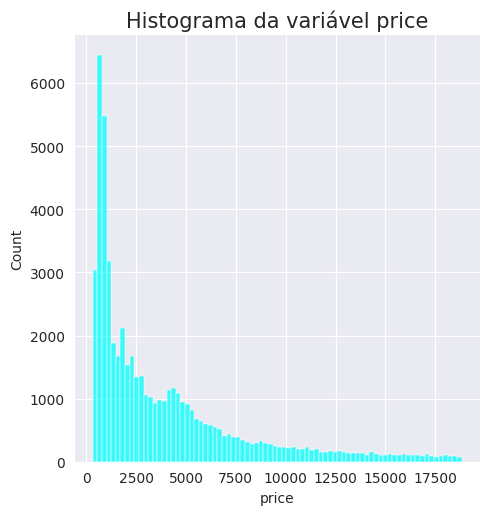

In [ ]:
sns.displot(data=diamonds.price, color = "cyan")
plt.title("Histograma da variável price", fontsize = 15)
plt.show()

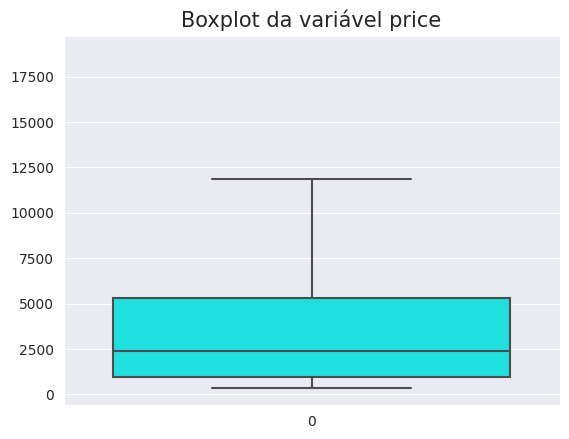

In [ ]:
sns.boxplot(data=diamonds.price,  fliersize = 0,  color = "cyan")
plt.title("Boxplot da variável price", fontsize = 15)
plt.show()

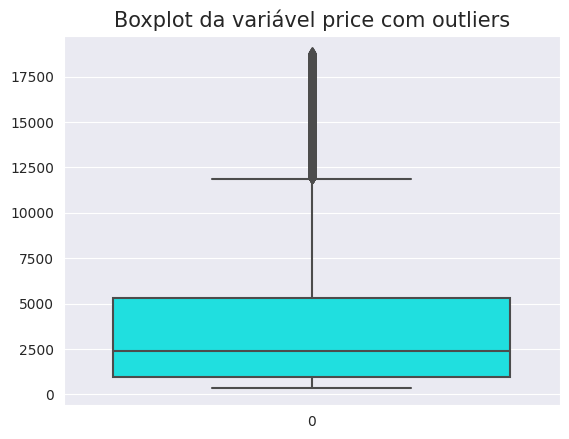

In [ ]:
sns.boxplot(data=diamonds.price, color = "cyan")
plt.title("Boxplot da variável price com outliers", fontsize = 15)
plt.show()

In [ ]:
Q1 = diamonds.price.quantile(q=0.25)
Q3 = diamonds.price.quantile(q=0.75)
AIQ = Q3 - Q1
print(AIQ)
linf = Q1 - 1.5*AIQ
lsup = Q3 + 1.5*AIQ
print("linf =", linf)
print("lsup =", lsup)

# Esses cálculos trazem como resultado os outliers, que são os valores extremos que são encontrados foras dos quartis. Geralmente são uma pequena quantidade de valores,
# mas indicam uma possível variância de dados. O resultado inferior é completamente descartável, já que pela baíxissima quantidade desses dados e pelo pouco valor,
# podem ser desprezados, já o superior deve ser levado em conta, já que são valores bem mais altos que a média, o que aumenta indicadores como o desvio padrão.

4374.25
linf = -5611.375
lsup = 11885.625


In [ ]:
p80 = np.percentile(diamonds.price, 80).round(2)
p90 = np.percentile(diamonds.price, 90)
p95 = np.percentile(diamonds.price, 95).round(2)
print(p80)
print(p90)
print(p95)
# Aqui são calculados os percentis, que dizem a máxima quantidade dos valores até certa porcentagem, por exemplo, 90% dos valores estão até 9.821. Também são utéis para ter uma noção
# melhor de como estão distribuídos os dados.

6301.2
9821.0
13107.1


Analisando tanto o histograma quanto o boxplot, fica ainda mais notável que a maior parte dos valores são os que vão até 2.500, o que é apontado pelo Q2 (2.401), e após essa métrica vão diminuindo consideravalmente, principalmente depois do Q3 (5.324). Fazendo um boxplot considerando os outliers, uma linha bem uniforme acaba se formando após o encerramento dos limites dele, indicando que há sim uma boa quantidade de valores maiores que a média. Os percentis de 80%, 90% e 95% tem uma alta crescente em suas quantidades (6.301, 9.821 e 13.107, respectivamente), o que reforça a hipótese de valores alto em pequenas quantidades.

# **Correlacionando Price com outras variáveis usando gráficos**

In [ ]:
price = diamonds["price"]
carat = diamonds["carat"]
cut = diamonds["cut"]
color = diamonds["color"]
clarity = diamonds["clarity"]
depth = diamonds["depth"]
table = diamonds["table"]
x = diamonds["x"]
y = diamonds["y"]
z = diamonds["z"]


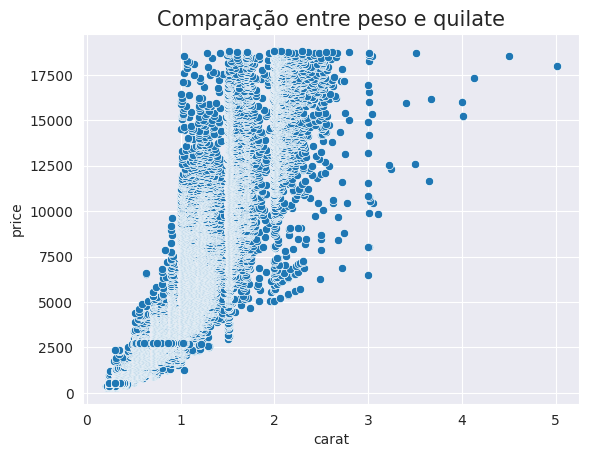

In [ ]:
sns.scatterplot(x=carat, y = price)
plt.title("Comparação entre peso e quilate", fontsize=15)
plt.show()
# Já nesse primeiro gráfico fica claro que o quilate influencia diretamente no valor do diamente, pois quanto mais alto for o quilate mais alto fica
# o valor do diamante, assim ele servirá de base para outras variáveis.

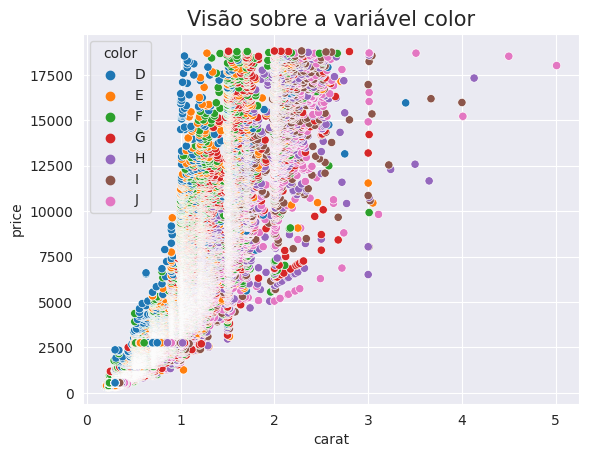

In [ ]:
sns.scatterplot(x = carat, y = price, hue = color)
plt.title("Visão sobre a variável color", fontsize=15)
plt.show()
# Percebe-se que a cor costuma influenciar somente nos diamantes de menor quilate, já que eles quase sempre apresentam a cor D(Melhor).

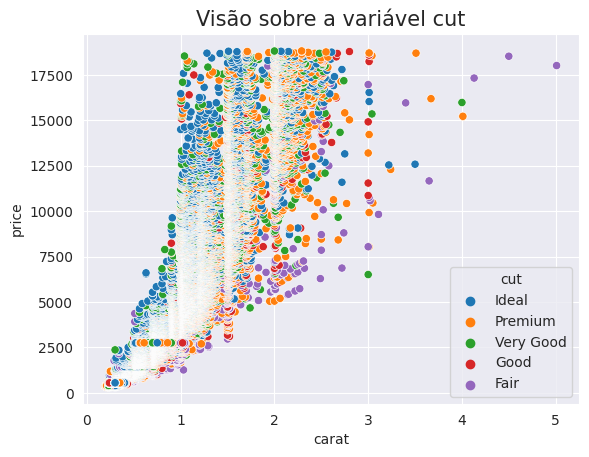

In [ ]:
sns.scatterplot(x = carat, y = price, hue = cut)
plt.title("Visão sobre a variável cut", fontsize=15)
plt.show()
# O corte não costuma influenciar muito, já que as bolinhas tem cores bem heterogêneas por todo o gráfico.

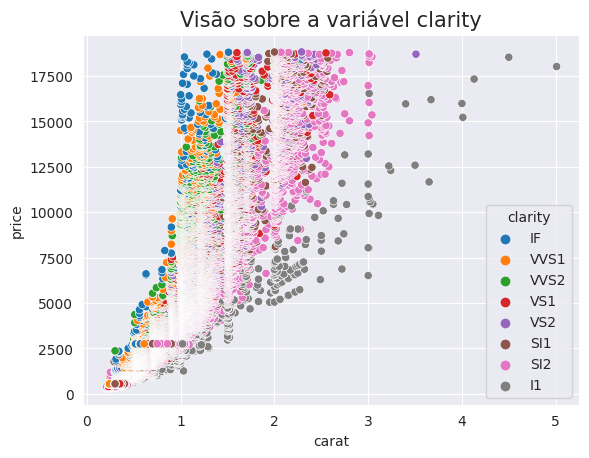

In [ ]:
sns.scatterplot(x = carat, y = price, hue = clarity)
plt.title("Visão sobre a variável clarity", fontsize=15)
plt.show()
# Aqui existe um caso bem semelhante ao da cor, já que os diamantes de menor quilate tem seu valor impulsionado pela limpeza. Também é interessante notar que os diamantes de maior
# quilate (4-5) tem uma limpeza e cores bem ruins, mas seus valores também são impulsionados pelo quilate

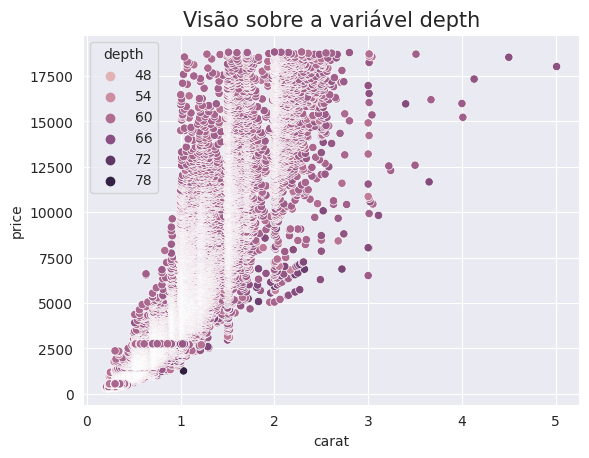

In [ ]:
sns.scatterplot(x = carat, y = price, hue = depth)
plt.title("Visão sobre a variável depth", fontsize=15)
plt.show()

In [ ]:
frequencia_depth = Counter(df["depth"])
array_frequencia_depth = list(frequencia_depth.items())
print(array_frequencia_depth)
# Depth não influencia em nada o valor dos diamantes, visto que a maior parte de sua quantidade está localizada entre 60-66,
# então não há nem possibilidade dele fazer muita diferença.

[(61.5, 1719), (59.8, 412), (56.9, 26), (62.4, 1792), (63.3, 705), (62.8, 1233), (62.3, 1940), (61.9, 2163), (65.1, 67), (59.4, 304), (64.0, 216), (60.4, 627), (62.2, 2039), (60.2, 610), (60.9, 1064), (62.0, 2239), (63.4, 608), (63.8, 441), (62.7, 1306), (61.0, 1205), (58.1, 94), (62.5, 1563), (60.5, 690), (60.0, 511), (60.7, 872), (59.5, 329), (58.2, 113), (64.1, 170), (60.8, 923), (61.8, 2077), (61.2, 1426), (61.1, 1258), (65.2, 52), (58.4, 117), (63.1, 827), (61.6, 1956), (59.3, 290), (62.6, 1497), (63.0, 862), (63.2, 663), (62.1, 2020), (61.4, 1613), (62.9, 1096), (63.7, 455), (59.2, 273), (59.9, 453), (57.9, 78), (55.1, 3), (57.5, 46), (66.3, 25), (61.7, 1904), (58.8, 202), (64.5, 98), (65.3, 58), (59.6, 384), (64.4, 87), (65.7, 39), (63.6, 470), (61.3, 1590), (60.1, 550), (60.3, 592), (58.0, 91), (64.6, 105), (59.7, 363), (57.8, 51), (67.9, 4), (60.6, 807), (57.2, 27), (64.2, 154), (65.8, 47), (67.4, 8), (59.0, 180), (63.5, 534), (67.3, 13), (58.7, 139), (66.4, 17), (68.1, 3), (6

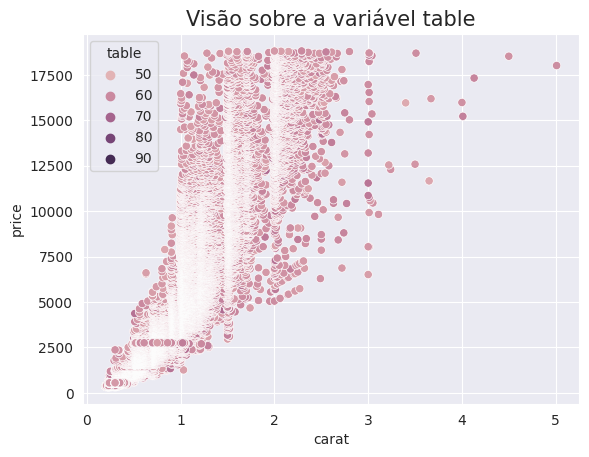

In [ ]:
sns.scatterplot(x = carat, y = price, hue = table)
plt.title("Visão sobre a variável table", fontsize=15)
plt.show()
# O caso é praticamente igual ao do table, seus valores estão muito concrecentados em um intervalo, então não há possibilidade de alta interferência.

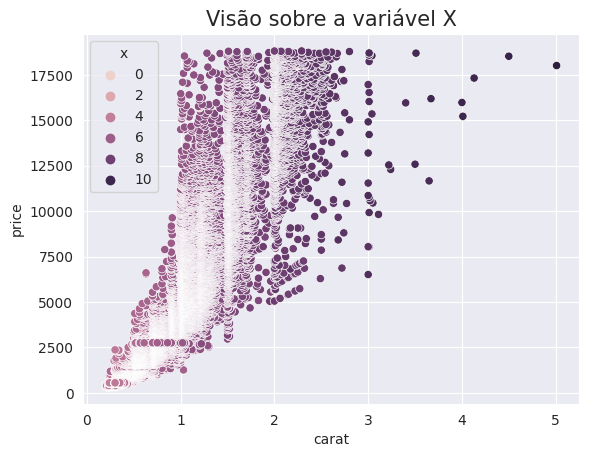

In [ ]:
sns.scatterplot(x = carat, y = price, hue = x)
plt.title("Visão sobre a variável X", fontsize=15)
plt.show()

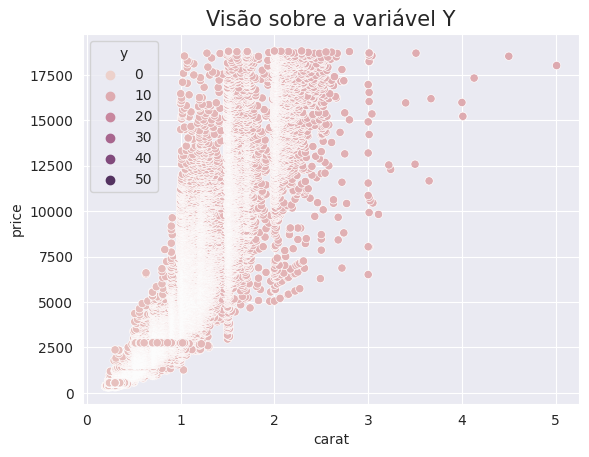

In [ ]:
sns.scatterplot(x = carat, y = price, hue = y)
plt.title("Visão sobre a variável Y", fontsize=15)
plt.show()

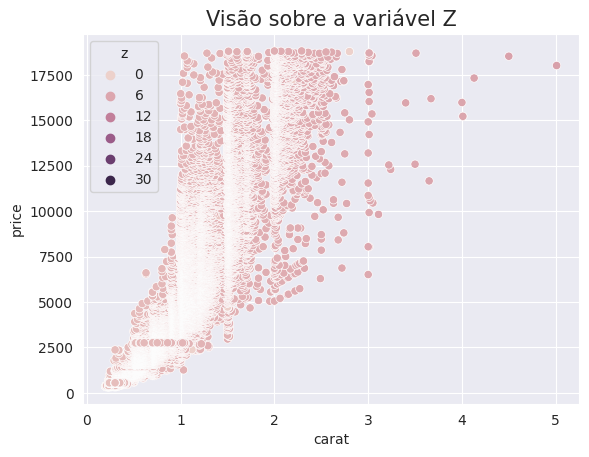

In [ ]:
sns.scatterplot(x = carat, y = price, hue = z)
plt.title("Visão sobre a variável Z", fontsize=15)
plt.show()

In [ ]:
# Dentro das 3 dimensões do diamente, somente o comprimento parece ter certa influência, já que quanto maior ele, maior o valor, e com os outros não há isso,
# já que eles tem praticamente todos a mesma quantidade,
# O comprimento de x influencia diretamente no peso do diamante, visto que os com maior quilate apresentam maior comprimento.

# **Correlacionando usando o coeficiente de Pearson**

In [ ]:
diamonds.corr().round(2)
# É possivel ter mais uma noção da grande influência do carat, e da baixa de depth e table. Além disso, as variáveis "y" e "z" realmente mudam o preço,
# pois quando mais próximo de 1 ou -1, maior a influência da variável, e seus valores beiram os 0.90, logicamente eles também se influenciam, já que os tamanhos costumam ser uniformes.

,carat,depth,table,price,x,y,z
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.95
depth,0.03,1.00,-0.30,-0.01,-0.03,-0.03,0.09
table,0.18,-0.30,1.00,0.13,0.20,0.18,0.15
price,0.92,-0.01,0.13,1.00,0.88,0.87,0.86
x,0.98,-0.03,0.20,0.88,1.00,0.97,0.97
y,0.95,-0.03,0.18,0.87,0.97,1.00,0.95
z,0.95,0.09,0.15,0.86,0.97,0.95,1.00


In [ ]:
df = pd.DataFrame(diamonds)
df_codificado=pd.get_dummies(df, columns=["color", "clarity", "cut"])

In [ ]:
df_codificado.corr().round(2)
# Nesta enorme tabela, a baixa influência das variáveis "color", "clarity" e "cut" fica ainda mais clara, já que seus valores não chegam nem perto de 1 ou -1, e nem ao menos estão
# em ordem crescente ou decrescente quando comparado ao price.

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,...,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.95,-0.11,-0.14,-0.06,...,-0.06,-0.04,0.06,0.27,0.12,-0.16,0.12,0.01,0.03,0.09
depth,0.03,1.00,-0.30,-0.01,-0.03,-0.03,0.09,-0.01,-0.03,-0.02,...,-0.02,-0.01,0.04,0.01,0.08,-0.02,-0.20,0.03,0.14,0.28
table,0.18,-0.30,1.00,0.13,0.20,0.18,0.15,-0.01,0.01,-0.00,...,-0.03,-0.01,0.05,0.10,0.04,-0.55,0.34,0.12,0.18,0.13
price,0.92,-0.01,0.13,1.00,0.88,0.87,0.86,-0.07,-0.10,-0.02,...,-0.01,-0.00,0.01,0.13,-0.00,-0.10,0.10,0.01,-0.00,0.02
x,0.98,-0.03,0.20,0.88,1.00,0.97,0.97,-0.11,-0.13,-0.05,...,-0.06,-0.04,0.08,0.27,0.11,-0.16,0.13,0.00,0.03,0.08
y,0.95,-0.03,0.18,0.87,0.97,1.00,0.95,-0.10,-0.13,-0.05,...,-0.06,-0.04,0.08,0.26,0.10,-0.15,0.11,0.02,0.03,0.07
z,0.95,0.09,0.15,0.86,0.97,0.95,1.00,-0.11,-0.13,-0.05,...,-0.06,-0.04,0.08,0.26,0.11,-0.16,0.09,0.02,0.05,0.11
color_D,-0.11,-0.01,-0.01,-0.07,-0.11,-0.10,-0.11,1.00,-0.18,-0.18,...,-0.05,0.02,0.06,0.03,-0.02,0.01,-0.02,-0.00,0.01,-0.01
color_E,-0.14,-0.03,0.01,-0.10,-0.13,-0.13,-0.13,-0.18,1.00,-0.22,...,-0.03,0.03,0.01,0.01,-0.01,-0.00,-0.02,0.02,0.01,-0.02
color_F,-0.06,-0.02,-0.00,-0.02,-0.05,-0.05,-0.05,-0.18,-0.22,1.00,...,-0.01,0.00,-0.02,-0.00,0.00,0.00,-0.01,0.00,0.01,0.01


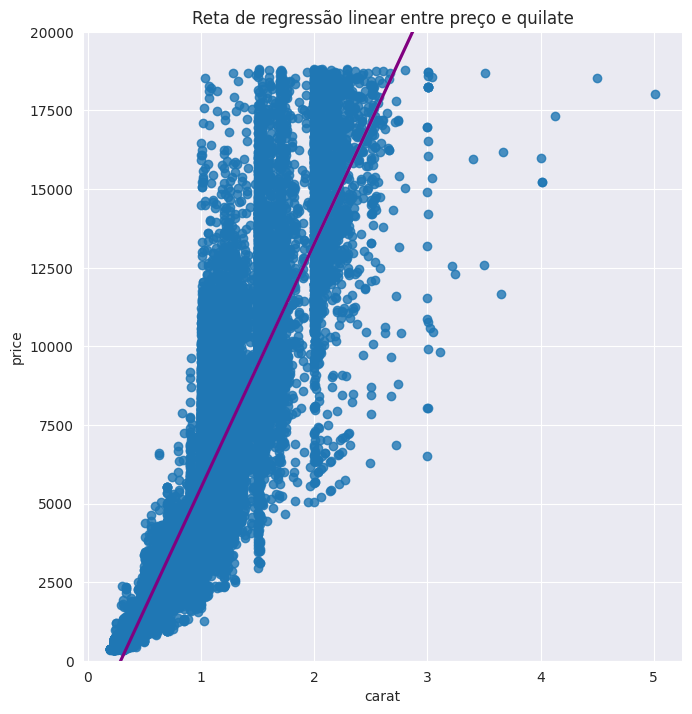

In [ ]:
sns.pairplot(data=diamonds, x_vars="carat", y_vars="price", kind="reg", plot_kws={"line_kws" :{"color" : "purple"}}, height = 7)
plt.ylim(0, 20000)
plt.title("Reta de regressão linear entre preço e quilate")
plt.show()
# A reta de regressão linear serve para descrever a relação entre duas variáveis quantitativas, então quanto mais os valores estiverem próximos da reta, mais ele se correlacionam.
# Por conta da alta correlação, uma quantidade bem baixa de dados estão longe da reta.

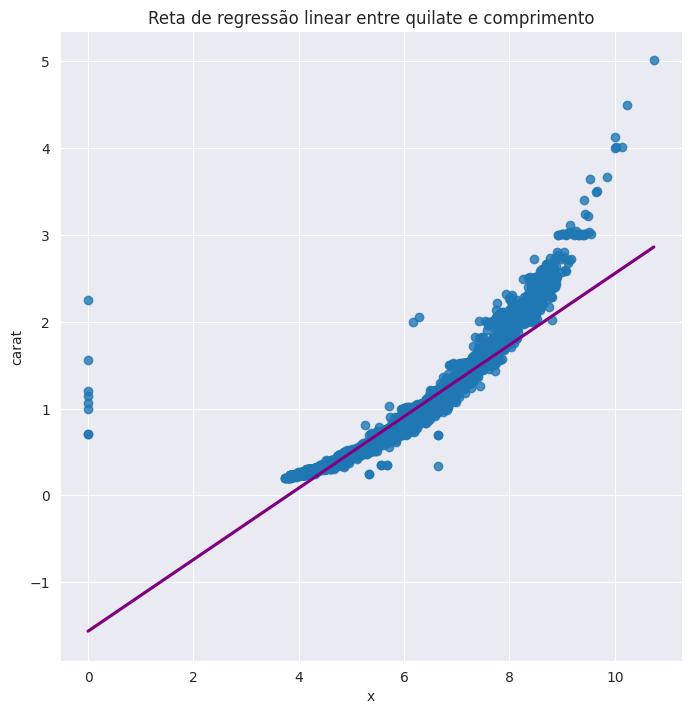

In [ ]:
sns.pairplot(data=diamonds, x_vars="x", y_vars="carat", kind="reg", plot_kws={"line_kws" :{"color" : "purple"}}, height = 7)
plt.title("Reta de regressão linear entre quilate e comprimento")
plt.show()
# Também por conta da alta correlação, uma quantidade bem baixa de dados estão longe da reta.

# **Recortes da variável price**

In [ ]:
price_recortadoalto = diamonds[diamonds["price"] > 12000]

In [ ]:
price_recortadoalto.price.shape

(3463,)

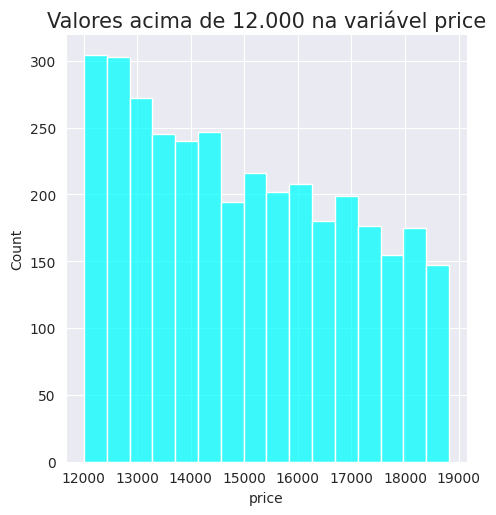

In [ ]:
sns.displot(price_recortadoalto.price, color = "cyan")
plt.title("Valores acima de 12.000 na variável price", fontsize = 15)
plt.show()

# Nesse gráfico é possível notar que apesar de existirem alguns valores bem mais alto que a média, eles estão em baixíssimo número, sendo apenas 3463 dados, de um total de
# 53.940 desses mesmos. E esses valores vão diminuindo de quantidade conforme ficam mais altos.

In [ ]:
price_recortadoalto.price.describe()

# Quando buscamos sua média, ela possui um desvio padrão bem menor do que a total do dataset, já que seus valores não estão muito espalhados em comparação a todos, e é um conjunto
# bem menor.

count     3463.000000
mean     15009.699394
std       1956.873204
min      12004.000000
25%      13255.000000
50%      14812.000000
75%      16650.000000
max      18823.000000
Name: price, dtype: float64

In [ ]:
price_recortadobaixo = diamonds[diamonds["price"] < 2500]


In [ ]:
price_recortadobaixo.shape

(27540, 10)

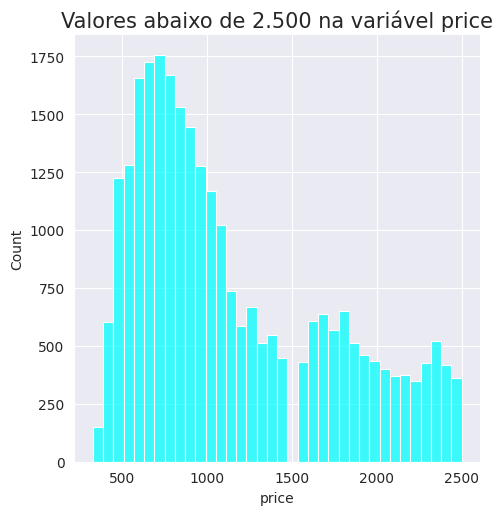

In [ ]:
sns.displot(price_recortadobaixo.price, color = "cyan")
plt.title("Valores abaixo de 2.500 na variável price", fontsize = 15)
plt.show()
# Ocorre algo semelhante ao recorte anterior, pois a quantidade também diminue conforme o valor vai aumentando.

In [ ]:
price_recortadobaixo.price.describe()
# Contando no máximo até o Q2, vemos uma análise bem mais uniforme, mas ainda com discrepâncias, já que seu desvio padrão continua um pouco alto, mas bem menor se comparado ao outro.

count    27540.000000
mean      1152.407117
std        574.251847
min        326.000000
25%        698.000000
50%        964.000000
75%       1614.000000
max       2499.000000
Name: price, dtype: float64

In [ ]:
carat_recortadoalto = diamonds[diamonds["carat"] > 3.00]

In [ ]:
carat_recortadoalto.carat.describe()

count    32.000000
mean      3.351562
std       0.518037
min       3.010000
25%       3.010000
50%       3.040000
75%       3.545000
max       5.010000
Name: carat, dtype: float64

In [ ]:
carat_recortadoalto.value_counts()
# Aqui podemos perceber que todos os diamantes acima de 3 de quilate apresentam valores bem altos, em quase todas as vezes passando de 10.000.

carat  cut        color  clarity  depth  table  price  x      y      z   
3.01   Good       I      SI2      63.9   60.0   18242  9.06   9.01   5.77    2
       Fair       I      SI2      65.8   56.0   18242  8.99   8.94   5.90    2
       Ideal      J      SI2      61.7   58.0   16037  9.25   9.20   5.69    1
3.11   Fair       J      I1       65.9   57.0   9823   9.15   9.02   5.98    1
4.50   Fair       J      I1       65.8   58.0   18531  10.23  10.16  6.72    1
4.13   Fair       H      I1       64.8   61.0   17329  10.00  9.85   6.43    1
4.01   Premium    J      I1       62.5   62.0   15223  10.02  9.94   6.24    1
                  I      I1       61.0   61.0   15223  10.14  10.10  6.17    1
4.00   Very Good  I      I1       63.3   58.0   15984  10.01  9.94   6.31    1
3.67   Premium    I      I1       62.4   56.0   16193  9.86   9.81   6.13    1
3.65   Fair       H      I1       67.1   53.0   11668  9.53   9.48   6.38    1
3.51   Premium    J      VS2      62.5   59.0   18701  9.

# **Conclusão**

A maior conclusão que se pode tirar é que os valores que mais influenciam no preço são o quilate e as dimensões (x, y e z), já que seus valores do coeficiente de Pearson estão acima de 0.8, o que indica alta confiança. Isso também é bem claro nos gráficos de scatterplot, já que quanto maior o quilate e principalmente o x, maior valor. Diamantes com quilate superior a 3, apesar de estarem em baixíssima quantidade dentro do dataset, podem ser usados de exemplo, já que todos estão acima de 90% de todos os valores.

Variáveis como color, clarity, cut, table e depth não influenciam muito, já que nas 3 primeiras é possível encontrar diamantes dos piores tipos em valores altos, já que são impulsionados pelo quilate. Já tanto a table quando a depth não costumam variar muito pelo dataset, então fica um pouco díficil mensurar sua importância no valor em si, porém seus índices de coeficiente de Pearson são extremamente baixos (0.13 e -0.01, respectivamente), então entende-se que não influenciam muito.

A maior quantidade dos dados está localizada em quantidades mais baixas, já que até 50% dos valores estão abaixo de 2401, como foi visto na mediana.

Como é possível notar nos recortes, até usando de parâmetro valores bem baixos como menores que 2500, eles decaem rapidamente, indicando que realmente boa parte do dataset são de um preço bem baixo.